In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from itertools import product
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
file_name = 'BELU_021101_211103.csv'
df = pd.read_csv(file_name)
print(f'shape: {df.shape}')
df.head(10)

shape: (1119, 9)


,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BELU,D,20160701,0,400.0,400.0,395.0,396.0,3
1,BELU,D,20160704,0,403.0,416.0,403.0,407.0,11
2,BELU,D,20160705,0,401.0,401.0,400.0,400.0,5
3,BELU,D,20160706,0,400.0,400.0,390.0,395.0,185
4,BELU,D,20160707,0,397.0,397.0,397.0,397.0,1
5,BELU,D,20160708,0,399.0,399.0,399.0,399.0,1
6,BELU,D,20160711,0,398.0,415.0,396.0,398.0,599
7,BELU,D,20160712,0,400.0,408.0,394.0,394.0,33
8,BELU,D,20160713,0,403.0,403.0,394.0,402.0,4
9,BELU,D,20160714,0,397.0,397.0,396.0,396.0,3


In [3]:
df.drop(['<TICKER>', '<PER>', '<TIME>', '<OPEN>', '<LOW>', '<CLOSE>', '<VOL>'], axis=1, inplace=True)
df.drop([0, 1116, 1117, 1118], inplace=True)
print(df.shape)
df.head()

(1115, 2)


,<DATE>,<HIGH>
1,20160704,416.0
2,20160705,401.0
3,20160706,400.0
4,20160707,397.0
5,20160708,399.0


In [4]:
a = [max([df['<HIGH>'][i+j] for j in range(5)]) for i in range(1, 1115, 5)]
df_w=pd.DataFrame(pd.Series(a, name='High', index=df.index[:223]))
print(f'shape:{df_w.shape}')
df_w.head()

shape:(223, 1)


,High
1,416.0
2,415.0
3,395.0
4,393.0
5,540.0


In [5]:
p_value = adfuller(df_w['High'])[1]
print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.9559. 0.9559 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [6]:
df_w['HighLog'] = np.log(df_w['High'])
df_w['HighLogDiff_1'] = df_w['HighLog'] - df_w['HighLog'].shift(1)
df_w.head()

,High,HighLog,HighLogDiff_1
1,416.0,6.030685,NaN
2,415.0,6.028279,-0.002407
3,395.0,5.978886,-0.049393
4,393.0,5.973810,-0.005076
5,540.0,6.291569,0.317760


Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!


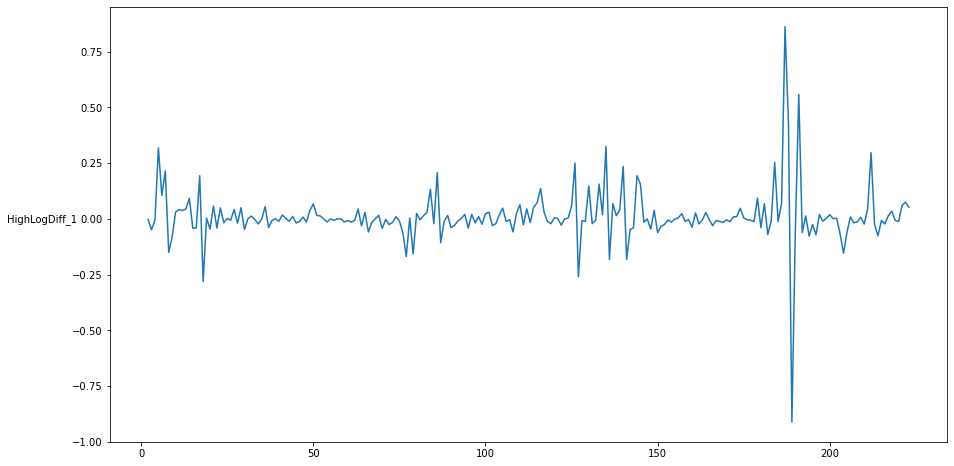

In [7]:
df_w['HighLogSDiff'] = df_w['HighLog'] - df_w['HighLog'].shift(12)
p_value = adfuller(df_w["HighLogDiff_1"][12:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!'
)

plt.figure(figsize=(15, 8))
plt.ylabel('HighLogDiff_1', rotation=0, labelpad=30)
df_w['HighLogDiff_1'].plot();

In [8]:
d=1
D=1

qs = range(1, 5)
Qs = range(1, 3)

ps = range(1, 5)
Ps = range(3, 5)

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

64

In [9]:
%%time
#warnings.filterwarnings('ignore')

results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            df_w['HighLog'][:179], 
            order=(param[0], d, param[1]), 
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

  0%|                                                                                           | 0/64 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

 23%|███████████████████▏                                                              | 15/64 [00:01<00:08,  6.00it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 25%|████████████████████▌                                                             | 16/64 [00:02<00:08,  5.55it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmod

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 45%|█████████████████████████████████████▏                                            | 29/64 [00:04<00:08,  4.35it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("M

 62%|███████████████████████████████████████████████████▎                              | 40/64 [00:06<00:06,  3.77it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 64%|████████████████████████████████████████████████████▌                             | 41/64 [00:07<00:06,  3.83it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base

 80%|█████████████████████████████████████████████████████████████████▎                | 51/64 [00:09<00:02,  4.34it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 81%|██████████████████████████████████████████████████████████████████▋               | 52/64 [00:09<00:02,  4.68it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmod

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 97%|███████████████████████████████████████████████████████████████████████████████▍  | 62/64 [00:13<00:00,  3.00it/s]C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("M

Wall time: 13.8 s


In [10]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                HighLog   No. Observations:                  179
Model:               SARIMAX(4, 1, 4)   Log Likelihood                 218.053
Date:                Mon, 27 Dec 2021   AIC                           -418.107
Time:                        02:51:48   BIC                           -389.471
Sample:                             0   HQIC                          -406.494
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3005      0.149     -8.716      0.000      -1.593      -1.008
ar.L2         -1.1991      0.224     -5.347      0.000      -1.639      -0.760
ar.L3         -1.1780      0.167     -7.042      0.0

In [11]:
df_w['Model'] = np.exp(best_model.fittedvalues)
df_w.head()

,High,HighLog,HighLogDiff_1,HighLogSDiff,Model
1,416.0,6.030685,NaN,NaN,1.000000
2,415.0,6.028279,-0.002407,NaN,415.999998
3,395.0,5.978886,-0.049393,NaN,415.138453
4,393.0,5.973810,-0.005076,NaN,397.251724
5,540.0,6.291569,0.317760,NaN,391.227620


In [12]:
predict_len = 45

new_close_value = df_w[['High', 'Model']]

future_df = pd.DataFrame(index=df_w.index, columns=['High', 'Model'])
new_close_value = pd.concat([new_close_value, future_df])

print(new_close_value.shape)
new_close_value.tail()

(446, 2)


,High,Model
219,NaN,NaN
220,NaN,NaN
221,NaN,NaN
222,NaN,NaN
223,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


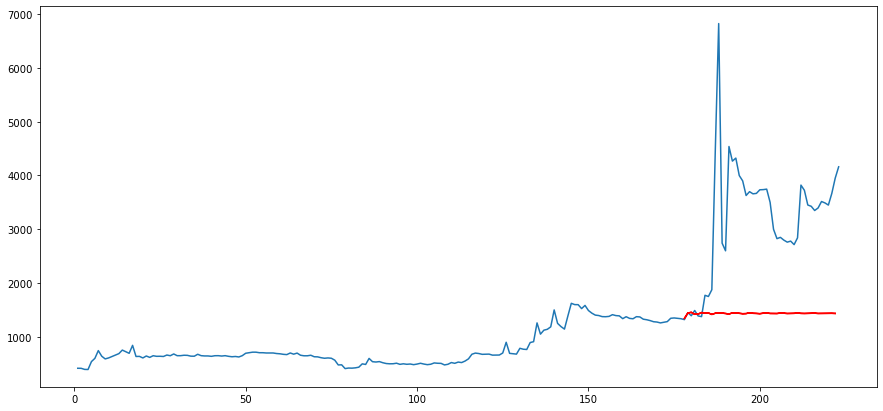

In [13]:
new_close_value['Model'] = np.exp(best_model.predict(start=178, end=178 + predict_len - 1))

plt.figure(figsize=(15,7))
new_close_value['High'].plot()
new_close_value['Model'].plot(c='r');

In [14]:
model = 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').